# us-crime-data-exploration-analysis-project 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


In [2]:
df=pd.read_csv('C:\\Users\\Vaibhav\\Documents\\uscrime.txt',sep="	")


In [3]:
df.head()

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
0,15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
1,14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
2,14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
3,13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
4,14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234


In [4]:
df.tail()

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
42,16.2,1,9.9,7.5,7.0,0.522,99.6,40,20.8,0.073,2.7,4960,22.4,0.054902,31.9989,823
43,13.6,0,12.1,9.5,9.6,0.574,101.2,29,3.6,0.111,3.7,6220,16.2,0.028100,30.0001,1030
44,13.9,1,8.8,4.6,4.1,0.480,96.8,19,4.9,0.135,5.3,4570,24.9,0.056202,32.5996,455
45,12.6,0,10.4,10.6,9.7,0.599,98.9,40,2.4,0.078,2.5,5930,17.1,0.046598,16.6999,508
46,13.0,0,12.1,9.0,9.1,0.623,104.9,3,2.2,0.113,4.0,5880,16.0,0.052802,16.0997,849


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       47 non-null     float64
 1   So      47 non-null     int64  
 2   Ed      47 non-null     float64
 3   Po1     47 non-null     float64
 4   Po2     47 non-null     float64
 5   LF      47 non-null     float64
 6   M.F     47 non-null     float64
 7   Pop     47 non-null     int64  
 8   NW      47 non-null     float64
 9   U1      47 non-null     float64
 10  U2      47 non-null     float64
 11  Wealth  47 non-null     int64  
 12  Ineq    47 non-null     float64
 13  Prob    47 non-null     float64
 14  Time    47 non-null     float64
 15  Crime   47 non-null     int64  
dtypes: float64(12), int64(4)
memory usage: 6.0 KB


In [6]:
df.describe()

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
count,47.000000,47.000000,47.00000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,13.857447,0.340426,10.56383,8.500000,8.023404,0.561191,98.302128,36.617021,10.112766,0.095468,3.397872,5253.829787,19.400000,0.047091,26.597921,905.085106
std,1.256763,0.478975,1.11870,2.971897,2.796132,0.040412,2.946737,38.071188,10.282882,0.018029,0.844545,964.909442,3.989606,0.022737,7.086895,386.762697
min,11.900000,0.000000,8.70000,4.500000,4.100000,0.480000,93.400000,3.000000,0.200000,0.070000,2.000000,2880.000000,12.600000,0.006900,12.199600,342.000000
25%,13.000000,0.000000,9.75000,6.250000,5.850000,0.530500,96.450000,10.000000,2.400000,0.080500,2.750000,4595.000000,16.550000,0.032701,21.600350,658.500000
50%,13.600000,0.000000,10.80000,7.800000,7.300000,0.560000,97.700000,25.000000,7.600000,0.092000,3.400000,5370.000000,17.600000,0.042100,25.800600,831.000000
75%,14.600000,1.000000,11.45000,10.450000,9.700000,0.593000,99.200000,41.500000,13.250000,0.104000,3.850000,5915.000000,22.750000,0.054450,30.450750,1057.500000
max,17.700000,1.000000,12.20000,16.600000,15.700000,0.641000,107.100000,168.000000,42.300000,0.142000,5.800000,6890.000000,27.600000,0.119804,44.000400,1993.000000


In [7]:
columns_names=df.columns.tolist()
print("Columns names:")
print(columns_names)


Columns names:
['M', 'So', 'Ed', 'Po1', 'Po2', 'LF', 'M.F', 'Pop', 'NW', 'U1', 'U2', 'Wealth', 'Ineq', 'Prob', 'Time', 'Crime']


In [8]:
df.shape

(47, 16)

In [9]:
X=df[columns_names[0:15]]
correlation=X.corr()
correlation


,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time
M,1.000000,0.584355,-0.530240,-0.505737,-0.513173,-0.160949,-0.028680,-0.280638,0.593198,-0.224381,-0.244843,-0.670055,0.639211,0.361116,0.114511
So,0.584355,1.000000,-0.702741,-0.372636,-0.376168,-0.505469,-0.314733,-0.049918,0.767103,-0.172419,0.071693,-0.636945,0.737181,0.530862,0.066813
Ed,-0.530240,-0.702741,1.000000,0.482952,0.499410,0.561178,0.436915,-0.017227,-0.664882,0.018103,-0.215682,0.735997,-0.768658,-0.389923,-0.253974
Po1,-0.505737,-0.372636,0.482952,1.000000,0.993586,0.121493,0.033760,0.526284,-0.213709,-0.043698,0.185093,0.787225,-0.630500,-0.473247,0.103358
Po2,-0.513173,-0.376168,0.499410,0.993586,1.000000,0.106350,0.022843,0.513789,-0.218768,-0.051712,0.169224,0.794262,-0.648152,-0.473027,0.075627
LF,-0.160949,-0.505469,0.561178,0.121493,0.106350,1.000000,0.513559,-0.123672,-0.341214,-0.229400,-0.420762,0.294632,-0.269886,-0.250086,-0.123640
M.F,-0.028680,-0.314733,0.436915,0.033760,0.022843,0.513559,1.000000,-0.410628,-0.327305,0.351892,-0.018692,0.179609,-0.167089,-0.050858,-0.427697
Pop,-0.280638,-0.049918,-0.017227,0.526284,0.513789,-0.123672,-0.410628,1.000000,0.095153,-0.038120,0.270422,0.308263,-0.126294,-0.347289,0.464210
NW,0.593198,0.767103,-0.664882,-0.213709,-0.218768,-0.341214,-0.327305,0.095153,1.000000,-0.156450,0.080908,-0.590107,0.677313,0.428059,0.230398
U1,-0.224381,-0.172419,0.018103,-0.043698,-0.051712,-0.229400,0.351892,-0.038120,-0.156450,1.000000,0.745925,0.044857,-0.063832,-0.007469,-0.169853


Text(0.5, 1.0, 'Correlation between different features')

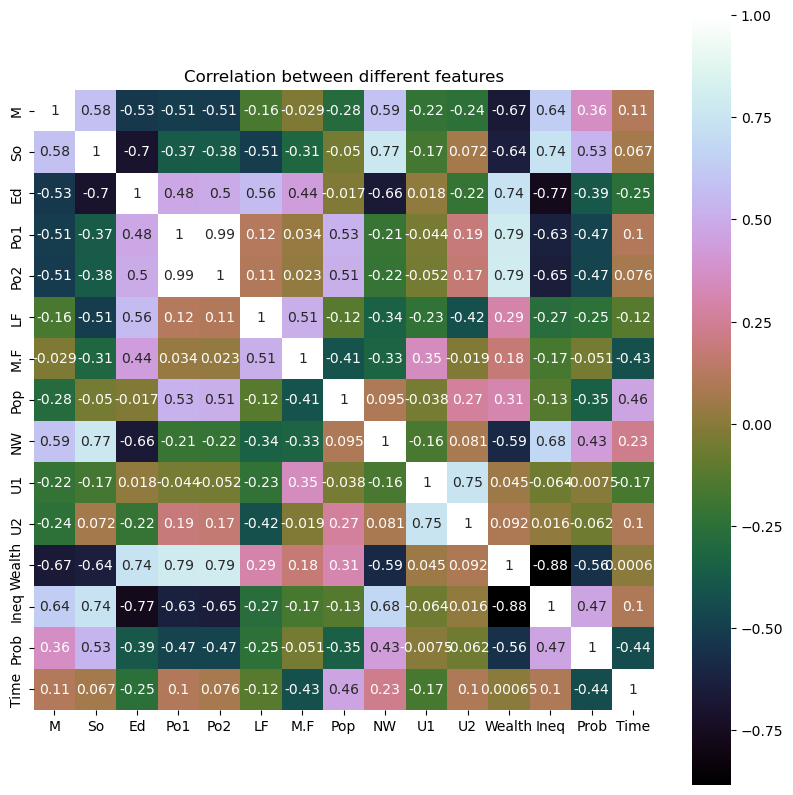

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between different features')


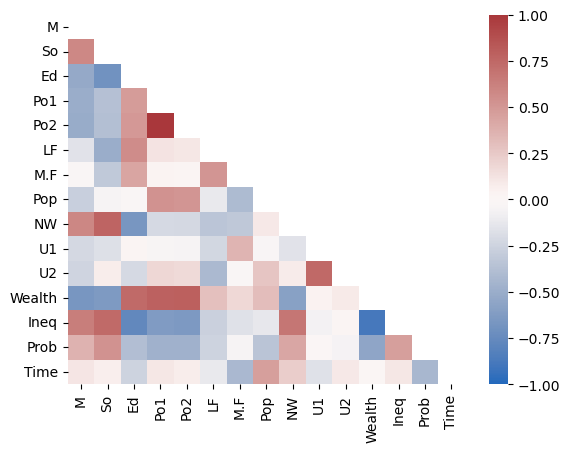

In [11]:
mask = np.triu(np.ones_like(correlation))
dataplot = sns.heatmap(correlation,vmax=1,vmin=-1,square=False, cmap="vlag", mask=mask)

Text(0.5, 1.0, 'Correlation between different features')

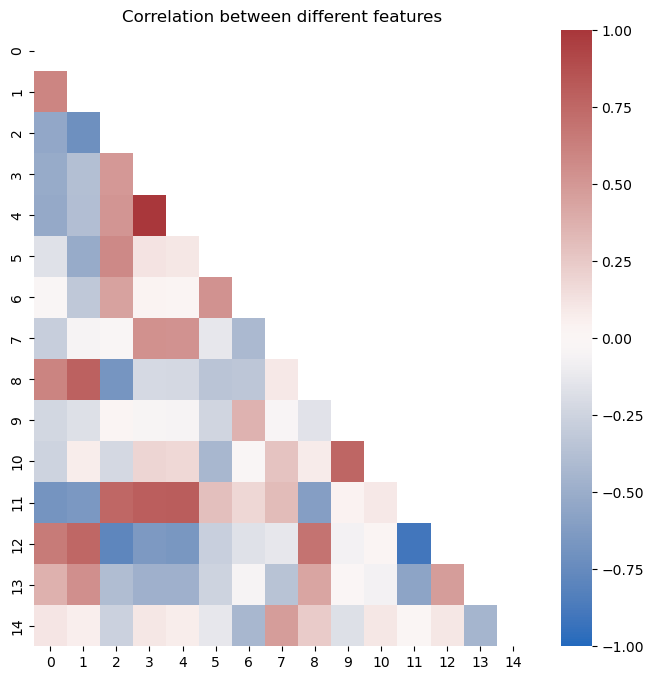

In [12]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
plt.figure(figsize=(8,8))
dataplot = sns.heatmap(cov_mat,vmax=1,vmin=-1,square=False, cmap="vlag", mask=mask)
plt.title('Correlation between different features')


In [13]:
pca = PCA().fit(X_std)
pca.explained_variance_


array([6.14979945e+00, 2.86275674e+00, 2.04853008e+00, 1.18747319e+00,
       9.79131558e-01, 5.65219854e-01, 3.28814745e-01, 3.14083906e-01,
       2.40267364e-01, 2.04226168e-01, 1.79504650e-01, 1.30976849e-01,
       7.08491194e-02, 5.97388034e-02, 4.71447269e-03])

In [14]:
pca.explained_variance_ratio_


array([4.01263510e-01, 1.86789802e-01, 1.33662956e-01, 7.74805200e-02,
       6.38865981e-02, 3.68795933e-02, 2.14545791e-02, 2.04934180e-02,
       1.56770195e-02, 1.33253954e-02, 1.17123602e-02, 8.54600716e-03,
       4.62277942e-03, 3.89785100e-03, 3.07610984e-04])

In [15]:
Cumulative_explained_variance=np.cumsum(pca.explained_variance_ratio_)
Cumulative_explained_variance


array([0.40126351, 0.58805331, 0.72171627, 0.79919679, 0.86308339,
       0.89996298, 0.92141756, 0.94191098, 0.957588  , 0.97091339,
       0.98262575, 0.99117176, 0.99579454, 0.99969239, 1.        ])

Text(0, 0.5, 'percentage of explained variance')

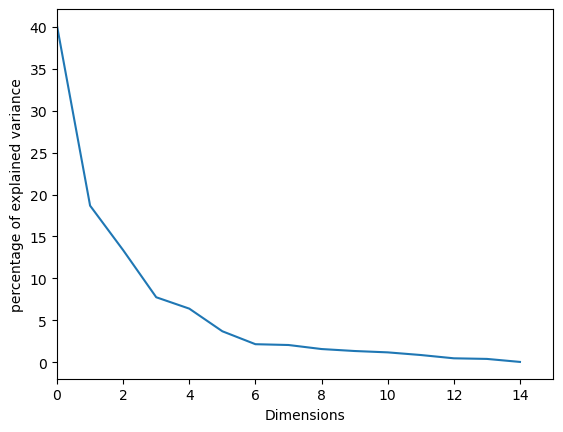

In [16]:
plt.plot(pca.explained_variance_ratio_*100)
plt.xlim(0,15,1)
plt.xlabel('Dimensions')
plt.ylabel('percentage of explained variance')


Text(0, 0.5, 'Cumulative explained variance')

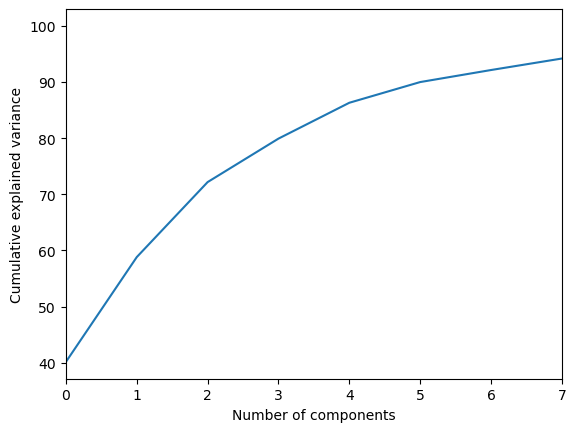

In [17]:
plt.plot(Cumulative_explained_variance*100)
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


In [18]:
X_train=X_std[0:42]
X_test=X_std[42:]
Y_train=df['Crime'][0:42]
Y_test=df['Crime'][42:]
X_test.shape


(5, 15)

In [19]:
pca=PCA(n_components=2)
X_train_pca =pca.fit_transform(X_train)


In [20]:
print(X_train_pca)


[[ 4.09928819  1.50677474]
 [-1.12183912 -0.80983434]
 [ 4.21393486  0.09904064]
 [-4.0933574   2.25738549]
 [-1.70832836 -1.56034128]
 [-2.96472835 -0.00734349]
 [-0.2970786   0.01479676]
 [ 0.02169309  1.41824604]
 [ 3.58360849  1.02642807]
 [-0.87532773 -3.19139958]
 [-2.8241578   2.33500482]
 [-1.05038071 -0.18902682]
 [-0.44628142 -1.20277528]
 [-0.25064002 -1.9822851 ]
 [ 3.31658803  0.22661735]
 [ 2.81757609  2.42256595]
 [ 0.31285572 -1.52962505]
 [ 0.12102556  0.57278093]
 [-3.10753732  1.21241347]
 [-2.52133402  1.53640934]
 [-1.20646584 -0.43558812]
 [ 5.58196153  1.62819728]
 [ 0.03483772  0.49519602]
 [-1.255755   -2.10449735]
 [ 0.01532476 -2.7237137 ]
 [-3.91834122 -1.3885614 ]
 [-0.88106014 -1.09900122]
 [-0.0428193  -1.54306882]
 [-4.04258997  4.40231124]
 [ 4.10578869  0.7444072 ]
 [ 0.75329491 -1.70703325]
 [-1.87907252  1.07926956]
 [ 1.93816639 -0.49949109]
 [-1.95215812 -0.78431384]
 [-1.99115094  2.83043286]
 [-1.33668862  1.31465134]
 [ 4.20964107  0.26818039]
 

In [21]:
X_test_pca = pca.transform(X_test)


In [22]:
from sklearn.linear_model import LinearRegression


In [23]:
model= LinearRegression()


In [24]:
model.fit(X_train_pca,Y_train)


LinearRegression()

In [25]:
model.score(X_test_pca,Y_test,)


-0.46790576514070104